<a href="https://colab.research.google.com/github/ewertonsilvag/Projeto_Conclusao_SoulCode/blob/main/DataFrame_MercadoAcoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Conexão GCP para ingestão dos dados

 #### autenticação de acesso a bucket GCP para INGESTÃO dos dados 

In [ ]:
#Importando biblioteca para autenticar conexão com GCP e criação de variáveis

from google.colab import auth

In [ ]:
project_id = "projeto-grupo2-economia"
bucket_name = "economia-dados-g2"

In [ ]:
auth.authenticate_user()

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#upload do dataset bruto direto para o bucket no folder 'entrada'
!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/AcoesBruto.csv gs://{bucket_name}/entrada/Acoes_Bruto.csv

Copying file:///content/drive/MyDrive/dados/PROJETO_FINAL/AcoesBruto.csv [Content-Type=text/csv]...
|
Operation completed over 1 objects/42.0 MiB.                                     


#PANDAS

### Operações com PANDAS (limpezas , transformações e normalizações) 

In [ ]:
pip install pandera

### importando as bibliotecas

In [ ]:
import pandas as pd
import pandera as pa

### ingestão dos dados da Bucket GCP 

In [ ]:
!gsutil cp gs://{bucket_name}/entrada/Acoes_Bruto.csv /content/drive/MyDrive/dados/PROJETO_FINAL/AcoesBruto.csv

Copying gs://economia-dados-g2/entrada/Acoes_Bruto.csv...
- [1 files][ 42.0 MiB/ 42.0 MiB]                                                
Operation completed over 1 objects/42.0 MiB.                                     


In [ ]:
#montando o dataframe em formato .csv
#comentario - 01
df_acoes = pd.read_csv(r"/content/drive/MyDrive/dados/PROJETO_FINAL/AcoesBruto.csv", 
                       sep=';', encoding='ISO8859-1', 
                       parse_dates=['ref.date'],
                       dayfirst=True, decimal=',')

### backup dados entrada no bucket GCP 
#### usando chave acesso ServiceAccount




In [ ]:
#from google.cloud import storage
#import os
#from io import StringIO

In [ ]:
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/MyDrive/dados/PROJETO_FINAL/chave_acessoGCP/projeto-final-grupo2-economia-608c2b8dd031.json'

In [ ]:
#client = storage.Client()
#bucket = client.get_bucket('g2economia-dados')  
#bucket.blob('entrada/df_acoes_Bruto.csv').upload_from_string(df_acoes.to_csv(), 'text/csv')

### verificações iniciais sobre a estrutura do dataframe

In [ ]:
df_acoes

,price.open,price.high,price.low,price.close,volume,price.adjusted,ref.date,ticker,ret.adjusted.prices,ret.closing.prices,Empresa,Setor,Subsetor,Tipo,Classificação
0,14.94,15.16,14.70,14.89,94500.0,14.74,2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,14.89,15.32,14.79,14.96,584700.0,14.81,2018-01-03,AALR3.SA,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15.00,15.16,14.81,15.09,290100.0,14.94,2018-01-04,AALR3.SA,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,15.05,15.17,14.95,15.05,131500.0,14.90,2018-01-05,AALR3.SA,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,15.05,15.10,14.62,14.79,244500.0,14.64,2018-01-08,AALR3.SA,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700.0,26.71,2021-03-24,YDUQ3.SA,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298857,26.81,27.73,26.26,27.73,2433000.0,27.73,2021-03-25,YDUQ3.SA,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298858,27.64,27.75,26.60,27.09,1801000.0,27.09,2021-03-26,YDUQ3.SA,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298859,26.89,27.24,26.43,26.71,1223600.0,26.71,2021-03-29,YDUQ3.SA,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap


In [ ]:
#resumo estatístico do dataframe
df_acoes.describe()

,price.open,price.high,price.low,price.close,volume,price.adjusted,ret.adjusted.prices,ret.closing.prices
count,298861.000000,298861.000000,298861.000000,298861.000000,2.988610e+05,2.988610e+05,298486.000000,298486.000000
mean,24.864123,25.128140,24.593715,24.865624,2.459531e+06,-6.927078e+03,0.004401,0.003353
std,39.034601,39.191963,38.906102,39.065673,1.109202e+07,5.106503e+05,0.679534,0.451878
min,0.460000,0.480000,0.430000,0.440000,0.000000e+00,-3.087797e+07,-1.079758,-0.990477
25%,6.290000,6.380000,6.170000,6.280000,1.000000e+02,5.990000e+00,-0.009130,-0.009231
50%,14.350000,14.620000,14.050000,14.350000,3.260000e+04,1.367000e+01,0.000000,0.000000
75%,28.610000,29.000000,28.150000,28.610000,1.241855e+06,2.702000e+01,0.008746,0.008596
max,1290.000000,1344.000000,1234.000000,1341.000000,9.395928e+08,1.693193e+06,277.247600,109.555600


In [ ]:
 #resumo qtde dados (298.861 linhas X 15 colunas)
df_acoes.shape

(298861, 15)

In [ ]:
#rótulo termina em 298.861 ao passo de 1
df_acoes.index

RangeIndex(start=0, stop=298861, step=1)

In [ ]:
#título de todas as colunas do data frame 
df_acoes.columns

Index(['price.open', 'price.high', 'price.low', 'price.close', 'volume',
       'price.adjusted', 'ref.date', 'ticker', 'ret.adjusted.prices',
       'ret.closing.prices', 'Empresa', 'Setor', 'Subsetor', 'Tipo',
       'Classificação'],
      dtype='object')

In [ ]:
#contagem de dados válidos em cada coluna
df_acoes.count()

price.open             298861
price.high             298861
price.low              298861
price.close            298861
volume                 298861
price.adjusted         298861
ref.date               298861
ticker                 298861
ret.adjusted.prices    298486
ret.closing.prices     298486
Empresa                298861
Setor                  298861
Subsetor               298861
Tipo                   298861
Classificação          298861
dtype: int64

In [ ]:
#verificando se as coluna ref.date está com o tipo 'datetime'
#verificando se as colunas de valores estão como o tipo 'float'
df_acoes.dtypes

price.open                    float64
price.high                    float64
price.low                     float64
price.close                   float64
volume                        float64
price.adjusted                float64
ref.date               datetime64[ns]
ticker                         object
ret.adjusted.prices           float64
ret.closing.prices            float64
Empresa                        object
Setor                          object
Subsetor                       object
Tipo                           object
Classificação                  object
dtype: object

In [ ]:
#comentario 02
df_acoes["volume"] = df_acoes["volume"].astype(int)

In [ ]:
#coluna 'volume' convertida para inteiro 
df_acoes.dtypes

price.open                    float64
price.high                    float64
price.low                     float64
price.close                   float64
volume                          int64
price.adjusted                float64
ref.date               datetime64[ns]
ticker                         object
ret.adjusted.prices           float64
ret.closing.prices            float64
Empresa                        object
Setor                          object
Subsetor                       object
Tipo                           object
Classificação                  object
dtype: object

### limpeza dos dados:

##### - verificando dados inconsistentes
##### - colunas para renomear/traduzir

In [ ]:
#renomenado as colunas


df_acoes.rename(columns={"price.open":"Preco_Abertura",
                   "price.high":"Maior_Preco",
                   "price.low":"Menor_Preco",
                   "price.close":"Preco_Fechamento",
                   "volume":"Volume",
                   "price.adjusted":"Preco_Ajustado",
                   "ref.date":"Data_Referencia",
                   "ticker":"Codigo_Acao",
                   "ret.adjusted.prices":"Ret_Preco_Ajustado",
                   "ret.closing.prices":"Ret_Preco_Fechamento",
                   "Classificação":"Classificacao"
                   },inplace = True) 


In [ ]:
#verificando tipos de dados existentes
df_acoes.dtypes

Preco_Abertura                 float64
Maior_Preco                    float64
Menor_Preco                    float64
Preco_Fechamento               float64
Volume                           int64
Preco_Ajustado                 float64
Data_Referencia         datetime64[ns]
Codigo_Acao                     object
Ret_Preco_Ajustado             float64
Ret_Preco_Fechamento           float64
Empresa                         object
Setor                           object
Subsetor                        object
Tipo                            object
Classificacao                   object
dtype: object

In [ ]:
df_acoes

In [ ]:
#verificando a existencia de algum dado 'NA' ou 'Null' no DataFrame
df_acoes.isnull().sum()
#375 registros nulos nas colunas 'Ret_Preco_Ajustado' e 'Ret_Preco_Fechamento'

Preco_Abertura            0
Maior_Preco               0
Menor_Preco               0
Preco_Fechamento          0
Volume                    0
Preco_Ajustado            0
Data_Referencia           0
Codigo_Acao               0
Ret_Preco_Ajustado      375
Ret_Preco_Fechamento    375
Empresa                   0
Setor                     0
Subsetor                  0
Tipo                      0
Classificacao             0
dtype: int64

In [ ]:
#mesmos 375 registros das colunas 'Ret_Preco_Ajustado' e 'Ret_Preco_Fechamento'
df_acoes.isna().sum()

Preco_Abertura            0
Maior_Preco               0
Menor_Preco               0
Preco_Fechamento          0
Volume                    0
Preco_Ajustado            0
Data_Referencia           0
Codigo_Acao               0
Ret_Preco_Ajustado      375
Ret_Preco_Fechamento    375
Empresa                   0
Setor                     0
Subsetor                  0
Tipo                      0
Classificacao             0
dtype: int64

In [ ]:
#filtrando os registros comvalor NA filter_Ajustado = df_acoes.Ret_Preco_Ajustado.isnull()
filter_Fechamento = df_acoes.Ret_Preco_Fechamento.isnull()
filter_Ajustado = df_acoes.Ret_Preco_Ajustado.isnull()
df_acoes.loc[filter_Ajustado]
df_acoes.loc[filter_Fechamento]

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
797,16.71,16.73,16.44,16.46,328681,13.89,2018-01-02,ABCB4.SA,NaN,NaN,ABC BRASIL,Financeiro,Intermediários Financeiros,Preferencial,Small Cap
1594,21.33,21.75,21.17,21.69,12717900,19.84,2018-01-02,ABEV3.SA,NaN,NaN,AMBEV S/A,Consumo não Cíclico,Bebidas,Ordinaria,Mega Cap
2391,4.98,4.98,4.98,4.98,1000,4.39,2018-01-02,AFLT3.SA,NaN,NaN,AFLUENTE T,Utilidade Pública,Utilidade Pública,Ordinaria,Micro Cap
3188,12.45,12.80,12.40,12.67,39100,11.01,2018-01-02,AGRO3.SA,NaN,NaN,BRASILAGRO,Consumo não Cíclico,Agropecuária,Ordinaria,Small Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294876,11.79,12.46,11.79,12.15,566200,9.25,2018-01-02,WIZS3.SA,NaN,NaN,WIZ S.A.,Financeiro,Previdência e Seguros,Ordinaria,Small Cap
295673,7.40,7.40,7.40,7.40,0,6.94,2018-01-02,WLMM3.SA,NaN,NaN,WLM IND COM,Bens Industriais,Comércio,Ordinaria,Micro Cap
296470,5.25,5.25,5.00,5.01,3800,4.81,2018-01-02,WLMM4.SA,NaN,NaN,WLM IND COM,Bens Industriais,Comércio,Preferencial,Micro Cap
297267,40.00,40.00,40.00,40.00,0,31.84,2018-01-02,WSON33.SA,NaN,NaN,WILSON SONS,Bens Industriais,Transporte,Ordinaria,-


In [ ]:
#verificando dados distintos nas colunas

#verifica dados unicos em todas as colunas de uma vez
'''for registro in df_acoes.columns:
    print(registro)
    print(df_acoes[registro].unique())
    print()
pd.unique(df_acoes['codigo_acao'])'''

"for registro in df_acoes.columns:\n    print(registro)\n    print(df_acoes[registro].unique())\n    print()\npd.unique(df_acoes['codigo_acao'])"

In [ ]:
pd.unique(df_acoes['Empresa'])

In [ ]:
print('--'*35)
cont = 0
for nome in (df_acoes['Empresa'].unique()):
    cont += 1
print(f'Total de {cont} empresas distintas.')
    

----------------------------------------------------------------------
Total de 283 empresas distintas.


In [ ]:
pd.unique(df_acoes['Setor'])

array(['Saúde', 'Financeiro', 'Consumo não Cíclico', 'Utilidade Pública',
       'Consumo Cíclico', 'Outros', 'Bens Industriais',
       'Materiais Básicos', 'Petróleo, Gás e Biocombustíveis',
       'Tecnologia da Informação', 'Comunicações'], dtype=object)

In [ ]:
pd.unique(df_acoes['Subsetor'])

array(['Análises e Diagnósticos', 'Intermediários Financeiros', 'Bebidas',
       'Utilidade Pública', 'Agropecuária', 'Viagens e Lazer',
       'Tecidos, Vestuário e Calçados', 'Exploração de Imóveis',
       'Energia Elétrica', 'Comércio', 'Diversos',
       'Previdência e Seguros', 'Outros', 'Construção e Engenharia',
       'Transporte', 'Serviços Financeiros Diversos', 'Equipamentos',
       'Alimentos Processados', 'Máquinas e Equipamentos',
       'Medicamentos e Outros Produtos', 'Hoteis e Restaurantes',
       'Produtos de Uso Pessoal e de Limpeza', 'Comércio e Distribuição',
       'Mineração', 'Petróleo, Gás e Biocombustíveis', 'Químicos',
       'Construção Civil', 'Serviços Diversos', 'Água e Saneamento',
       'Gás', 'Siderurgia e Metalurgia', 'Madeira e Papel',
       'Material de Transporte', 'Utilidades Domésticas',
       'Automóveis e Motocicletas', 'Programas e Serviços',
       'Holdings Diversificadas', 'Embalagens', 'Telecomunicações',
       'Computadores e Equ

In [ ]:
pd.unique(df_acoes['Tipo'])

array(['Ordinaria', 'Preferencial', 'BDR'], dtype=object)

In [ ]:
pd.unique(df_acoes['Classificacao'])

array(['Small Cap', 'Mega Cap', 'Micro Cap', 'Nano Cap', 'Mid Cap',
       'Big Cap', '-'], dtype=object)

### validação dos dados com Pandera

In [ ]:
schema_df = {
'Preco_Abertura':pa.Column(pa.Float),               
'Maior_Preco':pa.Column(pa.Float),                     
'Menor_Preco':pa.Column(pa.Float),                     
'Preco_Fechamento':pa.Column(pa.Float),                
'Volume':pa.Column(pa.Int),                          
'Preco_Ajustado':pa.Column(pa.Float),                  
'Data_Referencia':pa.Column(pa.DateTime),         
'Codigo_Acao':pa.Column(pa.String),                     
'Ret_Preco_Ajustado':pa.Column(pa.Float, nullable=True),              
'Ret_Preco_Fechamento':pa.Column(pa.Float, nullable=True),           
'Empresa':pa.Column(pa.String),                         
'Setor':pa.Column(pa.String),                           
'Subsetor':pa.Column(pa.String),                        
'Tipo':pa.Column(pa.String),                            
'Classificacao':pa.Column(pa.String)                  
}



In [ ]:
schema = pa.DataFrameSchema(columns=schema_df)
schema.validate(df_acoes)

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3.SA,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3.SA,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,15.05,15.17,14.95,15.05,131500,14.90,2018-01-05,AALR3.SA,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3.SA,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3.SA,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3.SA,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3.SA,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3.SA,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap


#### Criando DataFrames adicionais

In [ ]:
#criando novo DataFrame com a coluna 'Data_Referencia' no formato BR
#a coluna deixa de ser do tipo Datetime ao formatar para %d/%m/%Y e passa a ser Object 

df_acoes_pandas_dataBR = df_acoes.copy()


In [ ]:
df_acoes_pandas_dataBR

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3.SA,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3.SA,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,15.05,15.17,14.95,15.05,131500,14.90,2018-01-05,AALR3.SA,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3.SA,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3.SA,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3.SA,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3.SA,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3.SA,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap


In [ ]:
#setando a coluna 'Data_Referencia' no formato %d/%m/%Y
df_acoes_pandas_dataBR['Data_Referencia'] = df_acoes_pandas_dataBR['Data_Referencia'].dt.strftime('%d/%m/%Y')

In [ ]:
df_acoes_pandas_dataBR

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
0,14.94,15.16,14.70,14.89,94500,14.74,02/01/2018,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,14.89,15.32,14.79,14.96,584700,14.81,03/01/2018,AALR3.SA,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15.00,15.16,14.81,15.09,290100,14.94,04/01/2018,AALR3.SA,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,15.05,15.17,14.95,15.05,131500,14.90,05/01/2018,AALR3.SA,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,15.05,15.10,14.62,14.79,244500,14.64,08/01/2018,AALR3.SA,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,24/03/2021,YDUQ3.SA,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298857,26.81,27.73,26.26,27.73,2433000,27.73,25/03/2021,YDUQ3.SA,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298858,27.64,27.75,26.60,27.09,1801000,27.09,26/03/2021,YDUQ3.SA,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298859,26.89,27.24,26.43,26.71,1223600,26.71,29/03/2021,YDUQ3.SA,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap


In [ ]:
#a coluna 'Data_Referencia' ao ser formatada recebe o tipo Object
#comentario 02
df_acoes_pandas_dataBR.dtypes

Preco_Abertura          float64
Maior_Preco             float64
Menor_Preco             float64
Preco_Fechamento        float64
Volume                    int64
Preco_Ajustado          float64
Data_Referencia          object
Codigo_Acao              object
Ret_Preco_Ajustado      float64
Ret_Preco_Fechamento    float64
Empresa                  object
Setor                    object
Subsetor                 object
Tipo                     object
Classificacao            object
dtype: object

In [ ]:
#filtrando DataSet por data (a coluna é do tipo OBJETO)
df_acoes_pandas_dataBR.loc[df_acoes_pandas_dataBR.Data_Referencia == '24/03/2021']


In [ ]:
#criando RECORTES mar18 / mar19 / mar20 / mar21

df_mar18 = df_acoes.query('Data_Referencia>="2018-03-01" & Data_Referencia <="2018-03-30" ')
df_mar21 = df_acoes.query('Data_Referencia>="2021-03-01" & Data_Referencia <="2021-03-30" ')
df_mar20 = df_acoes.query('Data_Referencia>="2020-03-01" & Data_Referencia <="2020-03-30" ')
df_mar19 = df_acoes.query('Data_Referencia>="2019-03-01" & Data_Referencia <="2019-03-30" ')


In [ ]:
#dropando as colunas desnecessárias nos dataframes de recorte

lista = ['Preco_Abertura','Preco_Fechamento','Volume', 'Data_Referencia',
         'Codigo_Acao','Empresa','Subsetor','Maior_Preco','Menor_Preco',
         'Preco_Ajustado','Ret_Preco_Ajustado','Tipo','Classificacao']
df_val_mar18 = df_mar18.drop(lista, axis=1)
df_val_mar19 = df_mar19.drop(lista, axis=1)
df_val_mar20 = df_mar20.drop(lista, axis=1)
df_val_mar21 = df_mar21.drop(lista, axis=1) 

In [ ]:
#EM MARÇO/2018 a ação com maior Preço_Abertura foi BIC MONARKC (Setor Viagens e Lazer) a 358.98
df_mar18.max()

In [ ]:
df_mar18 = df_mar18.sort_values('Ret_Preco_Fechamento',ascending=False)
df_mar18.head(1)

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
207193,7.4,13.14,7.4,12.14,108800,12.14,2018-03-12,OSXB3.SA,0.709859,0.709859,OSX BRASIL,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis",Ordinaria,Nano Cap


In [ ]:
#EM MARÇO/2019 a ação com maior Preço_Abertura foi BIC MONARKC (Setor Viagens e Lazer) a 305
df_mar19.max()

In [ ]:
#esse valor de 305 foi atingido em 01/mar mas foi caindo ao longo do mesmo mês
df_mar19 = df_mar19.sort_values('Ret_Preco_Fechamento',ascending=False)
df_mar19.head(1)

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
13843,14.98,26.61,14.98,26.61,36443,26.61,2019-03-18,AZEV3.SA,0.67842,0.67842,AZEVEDO,Bens Industriais,Construção e Engenharia,Ordinaria,Nano Cap


In [ ]:
#EM MARÇO/20 o cenário já era completamente diferente, o maior Preço_Abertura no periodo
#foi 547.50 e pertence a uma empresa do setor Energia
df_mar20.max()

In [ ]:
df_mar20.sort_values('Preco_Abertura',ascending=False).head(1)
#df_mar20

,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
108062,547.5,547.5,547.5,547.5,0,525.07,2020-03-12,EEEL4.SA,0.0,0.0,CEEE-GT,Utilidade Pública,Energia Elétrica,Preferencial,Mid Cap


In [ ]:
#chegando em MARÇO/21 o maior Preço_Abertura já superava em 376% o valor de 2 anos atrás
df_mar21.max()

In [ ]:
#desta vez a ação pertence a uma Financeira
df_mar21.sort_values('Ret_Preco_Fechamento',ascending=False).head(5)




,Preco_Abertura,Maior_Preco,Menor_Preco,Preco_Fechamento,Volume,Preco_Ajustado,Data_Referencia,Codigo_Acao,Ret_Preco_Ajustado,Ret_Preco_Fechamento,Empresa,Setor,Subsetor,Tipo,Classificacao
41372,1082.00,1210.00,1081.00,1194.00,10120400,1194.00,2021-03-17,BPAN4.SA,109.555600,109.555600,BANCO PAN,Financeiro,Intermediários Financeiros,Preferencial,Mid Cap
41368,1147.00,1185.00,1092.00,1138.00,9900000,1138.00,2021-03-11,BPAN4.SA,99.886520,99.886520,BANCO PAN,Financeiro,Intermediários Financeiros,Preferencial,Mid Cap
211110,18.00,25.61,17.41,23.33,49361500,23.33,2021-03-01,PCAR3.SA,1.122839,1.122839,P.ACUCAR-CBD,Consumo não Cíclico,Comércio e Distribuição,Ordinaria,Mid Cap
176764,5.32,8.77,5.15,8.05,30777700,8.05,2021-03-29,LUPA3.SA,0.603586,0.603586,LUPATECH,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis",Ordinaria,Nano Cap
176761,2.80,4.37,2.80,4.22,10685600,4.22,2021-03-24,LUPA3.SA,0.574627,0.574627,LUPATECH,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis",Ordinaria,Nano Cap


In [ ]:
#mini dataframe com resumo empresa com maior Preco de Abertura em MAR/2018,2019,2020,2021

df_mar_anos = pd.DataFrame([
                    ['BIC MONARK',358.98,305.00,262.00,255.99],
                    ['CEEE-GT',150.00,227.22,547.50,600.00]],
                  columns = ['empresas','mar2018','mar2019','mar2020','mar2021'])

In [ ]:
df_mar_anos


,empresas,mar2018,mar2019,mar2020,mar2021
0,BIC MONARK,358.98,305.00,262.0,255.99
1,CEEE-GT,150.00,227.22,547.5,600.00


### PLOTAGEM insights simples 


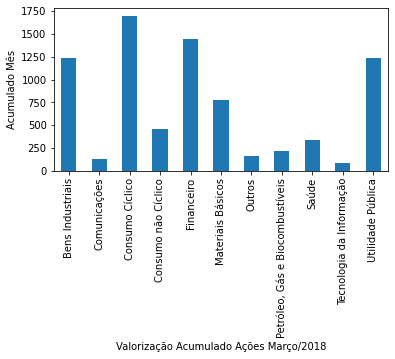

In [ ]:
df_val_mar18.groupby(['Setor']).size().plot.bar(figsize=(6,3),xlabel='Valorização Acumulado Ações Março/2018',ylabel='Acumulado Mês')

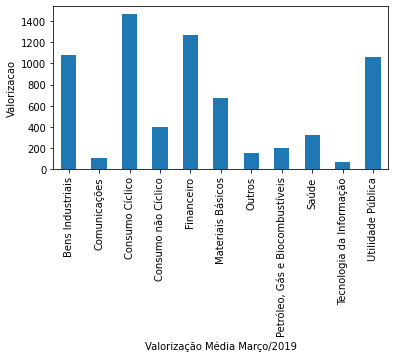

In [ ]:
df_val_mar19.groupby(['Setor']).size().plot.bar(figsize=(6,3),xlabel='Valorização Média Março/2019',ylabel='Valorizacao')

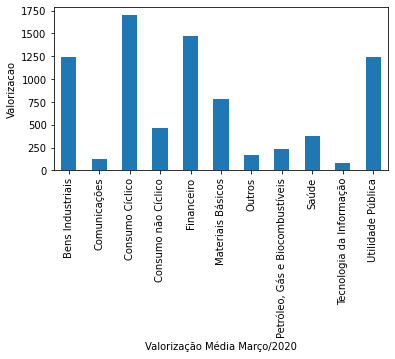

In [ ]:
df_val_mar20.groupby(['Setor']).size().plot.bar(figsize=(6,3),xlabel='Valorização Média Março/2020',ylabel='Valorizacao')

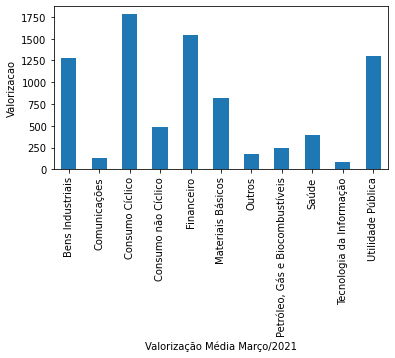

In [ ]:

df_val_mar21.groupby(['Setor']).size().plot.bar(figsize=(6,3),xlabel='Valorização Média Março/2021',ylabel='Valorizacao')

### LOAD DataSet tratado Pandas para GCP


*   acoes_pandas.csv
*   acoes_dataBR_pandas.csv


#####  

In [ ]:
#conversão para CSV
df_acoes.to_csv('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pandas.csv', index = False)

In [ ]:
df_acoes_pandas_dataBR.to_csv(r'/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_dataBR_pandas.csv', index=False)

In [ ]:
#ENVIO PARA GCP

!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pandas.csv gs://{bucket_name}/saida/dados_pandas/acoes_pandas.csv

Copying file:///content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pandas.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/40.0 MiB.                                     


In [ ]:
!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/acoes_dataBR_pandas.csv gs://{bucket_name}/saida/dados_pandas/acoes_dataBR_pandas.csv

Copying file:///content/drive/MyDrive/dados/PROJETO_FINAL/acoes_dataBR_pandas.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/40.0 MiB.                                     


# PySpark

#### instalando Pyspark

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 70.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=624defda403333a2a72e89d45301ff2dc13c9ea2c960dfe4543abda6401bc1bb
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


#### importando as bibliotecas necessárias

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import * 
import datetime
from pyspark.sql.window import Window

#### dowload da dataframe tratado no Pandas direto da GCP

In [ ]:
!gsutil cp gs://{bucket_name}/saida/dados_pandas/acoes_pandas.csv /content/drive/MyDrive/dados/PROJETO_FINAL/acoes_tratado_pandas.csv

Copying gs://economia-dados-g2/saida/dados_pandas/acoes_pandas.csv...
-
Operation completed over 1 objects/40.0 MiB.                                     


#### configurando o dataframe sua estrutura

In [ ]:
#configurando a SparkSession e para leitura do dataframe
spark = (SparkSession.builder
         .master("local")
         .appName("ProjetoFinalG2Economia")
         .config("spark.ui.port","4050")
         .getOrCreate())


In [ ]:
#lendo o dataframe usado seu proprio schema
df = spark.read.csv(r"/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_tratado_pandas.csv", header=True, inferSchema=True)
df.show(10)

+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+--------------------+--------------------+-------+-----+--------------------+---------+-------------+
|Preco_Abertura|Maior_Preco|Menor_Preco|Preco_Fechamento|Volume|Preco_Ajustado|Data_Referencia|Codigo_Acao|  Ret_Preco_Ajustado|Ret_Preco_Fechamento|Empresa|Setor|            Subsetor|     Tipo|Classificacao|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+--------------------+--------------------+-------+-----+--------------------+---------+-------------+
|         14.94|      15.16|       14.7|           14.89| 94500|         14.74|     2018-01-02|   AALR3.SA|                null|                null| ALLIAR|Saúde|Análises e Diagnó...|Ordinaria|    Small Cap|
|         14.89|      15.32|      14.79|           14.96|584700|         14.81|     2018-01-03|   AALR3.SA| 0.00470117769938838|  0.0047011417058429| ALLIAR|Saúde|A

In [ ]:
#o schema do dataframe
#algumas colunas vieram com tipo diferente do desejado
df.printSchema()

root
 |-- Preco_Abertura: double (nullable = true)
 |-- Maior_Preco: double (nullable = true)
 |-- Menor_Preco: double (nullable = true)
 |-- Preco_Fechamento: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Preco_Ajustado: double (nullable = true)
 |-- Data_Referencia: string (nullable = true)
 |-- Codigo_Acao: string (nullable = true)
 |-- Ret_Preco_Ajustado: double (nullable = true)
 |-- Ret_Preco_Fechamento: double (nullable = true)
 |-- Empresa: string (nullable = true)
 |-- Setor: string (nullable = true)
 |-- Subsetor: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Classificacao: string (nullable = true)



In [ ]:
#redefinindo o tipo de dados das colunas 
schema = StructType([ 
      StructField("Preco_Abertura",FloatType(),True),
      StructField("Maior_Preco",FloatType(),True),
      StructField("Menor_Preco",FloatType(),True),
      StructField("Preco_Fechamento",FloatType(),True),
      StructField("Volume",IntegerType(),True),
      StructField("Preco_Ajustado",FloatType(),True),
      StructField("Data_Referencia",DateType(),True),
      StructField("Codigo_Acao",StringType(),True),
      StructField("Ret_Preco_Ajustado",FloatType(),True),
      StructField("Ret_Preco_Fechamento",FloatType(),True),
      StructField("Empresa",StringType(),True),
      StructField("Setor",StringType(),True),
      StructField("Subsetor",StringType(),True),
      StructField("Tipo",StringType(),True),
      StructField("Classificacao",StringType(),True)])

local=("/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_tratado_pandas.csv")
df_acoes_struct = spark.read.load(local, format="csv", header="true", schema=schema)

In [ ]:
df_acoes_struct.show(10)

+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------------------+---------+-------------+
|Preco_Abertura|Maior_Preco|Menor_Preco|Preco_Fechamento|Volume|Preco_Ajustado|Data_Referencia|Codigo_Acao|Ret_Preco_Ajustado|Ret_Preco_Fechamento|Empresa|Setor|            Subsetor|     Tipo|Classificacao|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------------------+---------+-------------+
|         14.94|      15.16|       14.7|           14.89| 94500|         14.74|     2018-01-02|   AALR3.SA|              null|                null| ALLIAR|Saúde|Análises e Diagnó...|Ordinaria|    Small Cap|
|         14.89|      15.32|      14.79|           14.96|584700|         14.81|     2018-01-03|   AALR3.SA|      0.0047011776|        0.0047011417| ALLIAR|Saúde|Análises e 

In [ ]:
#conferindo se o tipo de dados das colunas está correto
df_acoes_struct.printSchema()

root
 |-- Preco_Abertura: float (nullable = true)
 |-- Maior_Preco: float (nullable = true)
 |-- Menor_Preco: float (nullable = true)
 |-- Preco_Fechamento: float (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Preco_Ajustado: float (nullable = true)
 |-- Data_Referencia: date (nullable = true)
 |-- Codigo_Acao: string (nullable = true)
 |-- Ret_Preco_Ajustado: float (nullable = true)
 |-- Ret_Preco_Fechamento: float (nullable = true)
 |-- Empresa: string (nullable = true)
 |-- Setor: string (nullable = true)
 |-- Subsetor: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Classificacao: string (nullable = true)



In [ ]:
#qtde de linhas do dataframe 298.861
df_acoes_struct.count()

298861

In [ ]:
#descrição básica do dataframe
df_acoes_struct.describe().show()

+-------+------------------+------------------+------------------+------------------+--------------------+-----------------+-----------+--------------------+--------------------+----------+-----------------+-----------------+------------+-------------+
|summary|    Preco_Abertura|       Maior_Preco|       Menor_Preco|  Preco_Fechamento|              Volume|   Preco_Ajustado|Codigo_Acao|  Ret_Preco_Ajustado|Ret_Preco_Fechamento|   Empresa|            Setor|         Subsetor|        Tipo|Classificacao|
+-------+------------------+------------------+------------------+------------------+--------------------+-----------------+-----------+--------------------+--------------------+----------+-----------------+-----------------+------------+-------------+
|  count|            298861|            298861|            298861|            298861|              298861|           298861|     298861|              298486|              298486|    298861|           298861|           298861|      298861|   

In [ ]:
#verificando a quantidade de registros nulos em cada coluna
df_acoes_struct.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df_acoes_struct.columns]).show()

+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+
|Preco_Abertura|Maior_Preco|Menor_Preco|Preco_Fechamento|Volume|Preco_Ajustado|Data_Referencia|Codigo_Acao|Ret_Preco_Ajustado|Ret_Preco_Fechamento|Empresa|Setor|Subsetor|Tipo|Classificacao|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+
|             0|          0|          0|               0|     0|             0|              0|          0|               375|                 375|      0|    0|       0|   0|            0|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+



In [ ]:
#definindo como 0 (zero) os registros nulos das colunas Ret_Preco_Ajustado e Ret_Preco_Fechamento
df_acoes_struct = df_acoes_struct.fillna({'Ret_Preco_Ajustado':0, 'Ret_Preco_Fechamento':0})

In [ ]:
df_acoes_struct.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df_acoes_struct.columns]).show()

+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+
|Preco_Abertura|Maior_Preco|Menor_Preco|Preco_Fechamento|Volume|Preco_Ajustado|Data_Referencia|Codigo_Acao|Ret_Preco_Ajustado|Ret_Preco_Fechamento|Empresa|Setor|Subsetor|Tipo|Classificacao|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+
|             0|          0|          0|               0|     0|             0|              0|          0|                 0|                   0|      0|    0|       0|   0|            0|
+--------------+-----------+-----------+----------------+------+--------------+---------------+-----------+------------------+--------------------+-------+-----+--------+----+-------------+



#### load do dataframe struturado no Drive e Bucket GCP

In [ ]:
# convertendo Spark_df para Pandas_df
df_acoes_struct_pd = df_acoes_struct.toPandas()

In [ ]:
#salvando Spark to Pandas no drive
df_acoes_struct_pd.to_csv('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv', index = False)

In [ ]:
#load do dataframe 'df_acoes_struct' tratado direto no Bucket GCP 
!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv gs://{bucket_name}/saida/dados_pyspark/


Copying file:///content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv [Content-Type=text/csv]...
- [1 files][ 39.5 MiB/ 39.5 MiB]                                                
Operation completed over 1 objects/39.5 MiB.                                     


#### extraindo informações do dataframe com PySpark

In [ ]:
#verificando as ações que valorizaram em todo periodo de resgistros (01/03/2018 a 30/03/21) 
df1=(df_acoes_struct.withColumn('Valorizou_No_Dia',
                                F.when(F.col("Preco_Fechamento")>=F.col("Preco_Abertura"),
                                       F.lit("SIM")).otherwise("NÃO")))

In [ ]:
df1=(df1.withColumn('Valorizacao',F.lit(F.col("Preco_Fechamento")-(F.col("Preco_Abertura")))))

In [ ]:
df1.select("Valorizou_No_Dia",
           "Preco_Abertura",
           "Preco_Fechamento",
           "Valorizacao","Data_Referencia",
           "Codigo_Acao","Empresa","Setor").orderBy("Valorizacao",ascending=False).show(10)

+----------------+--------------+----------------+-----------+---------------+-----------+------------+-----------------+
|Valorizou_No_Dia|Preco_Abertura|Preco_Fechamento|Valorizacao|Data_Referencia|Codigo_Acao|     Empresa|            Setor|
+----------------+--------------+----------------+-----------+---------------+-----------+------------+-----------------+
|             SIM|        162.74|           294.1|     131.36|     2019-08-26|   TELB3.SA|    TELEBRAS|     Comunicações|
|             SIM|         80.01|           200.0|     119.99|     2019-08-16|   MAPT4.SA|      CEMEPE|           Outros|
|             SIM|        1082.0|          1194.0|      112.0|     2021-03-17|   BPAN4.SA|   BANCO PAN|       Financeiro|
|             SIM|        182.88|          258.48|  75.600006|     2018-12-27|   GSHP3.SA|GENERALSHOPP|       Financeiro|
|             SIM|        1267.0|          1341.0|       74.0|     2021-02-23|   BPAN4.SA|   BANCO PAN|       Financeiro|
|             SIM|      

In [ ]:
# !!!inserir o RANK !!! 
#exibindo as 10 ações com maior volume de movimentação em uma data especifica
data = input('Digite a data no formato aaaa-mm-dd: ')
w0 = Window.orderBy(F.col('Volume').desc())
df1_rank_volume = df1.withColumn('rank',F.rank().over(w0))
df1_rank_volume.select("Volume","Codigo_Acao", "Valorizou_No_Dia").filter(F.col("Data_Referencia")==data).show(10)


Digite a data no formato aaaa-mm-dd: 2019-05-20
+--------+-----------+----------------+
|  Volume|Codigo_Acao|Valorizou_No_Dia|
+--------+-----------+----------------+
|   96300|   AALR3.SA|             SIM|
|  324500|   ABCB4.SA|             SIM|
|43284300|   ABEV3.SA|             NÃO|
|       0|   AFLT3.SA|             SIM|
|   19400|   AGRO3.SA|             NÃO|
|       0|   AHEB3.SA|             SIM|
|    7100|   ALPA3.SA|             NÃO|
|  943400|   ALPA4.SA|             SIM|
|   12700|   ALSO3.SA|             NÃO|
|    1100|   ALUP3.SA|             SIM|
+--------+-----------+----------------+
only showing top 10 rows



In [ ]:
#exibindo as 10 ações com maior variação (para MAIS ou para MENOS) em uma data especifica

data = input('Digite data no formato aaaa-mm-dd: ')
movimento = int(input('''Digite: 
[ 1 ] para VALORIZAÇÂO 
[ 2 ] para DESVALORIZAÇÂO 
: '''))
if movimento == 1:
    valorizacao = "SIM"
    
elif movimento == 2:
    valorizacao = "NÃO"

(df1.select("Codigo_Acao", "Preco_Abertura", "Preco_Fechamento", "Valorizou_No_Dia", "Valorizacao")
    .where((F.col("Data_Referencia")==data) & (F.col("Valorizou_No_Dia")==valorizacao))
    .orderBy("Valorizacao",ascending=False).show(10))



Digite data no formato aaaa-mm-dd: 2019-05-20
Digite: 
[ 1 ] para VALORIZAÇÂO 
[ 2 ] para DESVALORIZAÇÂO 
: 1
+-----------+--------------+----------------+----------------+-----------+
|Codigo_Acao|Preco_Abertura|Preco_Fechamento|Valorizou_No_Dia|Valorizacao|
+-----------+--------------+----------------+----------------+-----------+
|   BRKM3.SA|         36.99|            39.7|             SIM|   2.709999|
|   CSAN3.SA|         42.46|           44.35|             SIM|  1.8899994|
|   BAHI3.SA|        102.68|          104.56|             SIM|  1.8799973|
|   LREN3.SA|         39.16|           40.88|             SIM|  1.7200012|
|   IGTA3.SA|          35.5|           37.13|             SIM|  1.6300011|
|   SMLS3.SA|         39.01|           40.62|             SIM|  1.6100006|
|   RENT3.SA|         33.19|           34.67|             SIM|  1.4799995|
|   IRBR3.SA|         30.66|            32.1|             SIM|  1.4399986|
|   EGIE3.SA|         40.47|            41.9|             SIM|  1

In [ ]:
#verificar comportamento de uma ação especifica em um dia ou periodo
ticker = str(input('Digite Codigo_Acao: ')).upper().strip()
tempo = int(input('''Digite 
[ 1 ] pesquisar UNICO DIa ou 
[ 0 ] pesquisar por PERIODO '''))
if tempo == 1:
    dia = int(input('Digite Dia com 2 digitos (dd): '))
    mes = int(input('Digite mês com 2 digitos (mm): '))
    ano = int(input('Digite ano com 4 digitos (aaaa): '))
    data = f'{ano}-{mes}-{dia}'
    print()
    print('--'*20)

    df1.select(
    F.col("Data_Referencia"),
    F.col("Codigo_Acao"),
    F.col("Preco_Abertura"),
    F.col("Preco_Fechamento"),
    F.col("Valorizou_No_Dia")).filter(F.col("Codigo_Acao")==ticker).filter(F.col("Data_Referencia")==data).show(10)

else: 
    data_inicio = input('Digite data inicial no formato aaaa-mm-dd: ')
    data_fim = input('Digite data final dp periodo no formato aaaa-mm-dd: ')
    print()

    df1.select(
    F.col("Data_Referencia"),
    F.col("Codigo_Acao"),
    F.col("Preco_Abertura"),
    F.col("Preco_Fechamento"),
    F.col("Valorizou_No_Dia")).filter(F.col("Codigo_Acao")==ticker).where((F.col("Data_Referencia")>=data_inicio) & (F.col("Data_Referencia")<=data_fim )).show()



Digite Codigo_Acao: itub4.sa
Digite 
[ 1 ] pesquisar UNICO DIa ou 
[ 0 ] pesquisar por PERIODO 0
Digite data inicial no formato aaaa-mm-dd: 2018-03-15
Digite data final dp periodo no formato aaaa-mm-dd: 2018-03-30

+---------------+-----------+--------------+----------------+----------------+
|Data_Referencia|Codigo_Acao|Preco_Abertura|Preco_Fechamento|Valorizou_No_Dia|
+---------------+-----------+--------------+----------------+----------------+
|     2018-03-15|   ITUB4.SA|          34.0|           34.29|             SIM|
|     2018-03-16|   ITUB4.SA|         34.39|           34.15|             NÃO|
|     2018-03-19|   ITUB4.SA|         33.88|           33.41|             NÃO|
|     2018-03-20|   ITUB4.SA|         33.57|           33.52|             NÃO|
|     2018-03-21|   ITUB4.SA|         33.54|           33.39|             NÃO|
|     2018-03-22|   ITUB4.SA|         33.33|           33.28|             NÃO|
|     2018-03-23|   ITUB4.SA|         33.07|           33.44|             

In [ ]:
#Exibindo quantidade de Codigo_Acao distintos por Setor

df1.groupBy("Setor").agg(F.count_distinct("Codigo_Acao").alias("Qtde_Acoes")).orderBy("Qtde_Acoes",ascending=False).show()


+--------------------+----------+
|               Setor|Qtde_Acoes|
+--------------------+----------+
|     Consumo Cíclico|        81|
|          Financeiro|        70|
|    Bens Industriais|        59|
|   Utilidade Pública|        59|
|   Materiais Básicos|        37|
| Consumo não Cíclico|        22|
|               Saúde|        18|
|Petróleo, Gás e B...|        11|
|              Outros|         8|
|        Comunicações|         6|
|Tecnologia da Inf...|         4|
+--------------------+----------+



# SparkSQL

#### ingestão do Dataframe tratado com Pyspark do Bucket

In [ ]:
!gsutil cp gs://{bucket_name}/saida/dados_pyspark/acoes_pyspark.csv /content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv 

Copying gs://economia-dados-g2/saida/dados_pyspark/acoes_pyspark.csv...
/ [1 files][ 39.5 MiB/ 39.5 MiB]                                                
Operation completed over 1 objects/39.5 MiB.                                     


In [ ]:
df_acoes_sql = (spark
                .read
                .format("csv")
                .option("header","true")
                .option("inferschema", "true")
                .option("delimiter", ",")
                .load("/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv")
                .createOrReplaceTempView("tabela_acoes"))

In [ ]:
spark.sql(
'''
describe tabela_acoes
'''
).show()

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|      Preco_Abertura|   double|   null|
|         Maior_Preco|   double|   null|
|         Menor_Preco|   double|   null|
|    Preco_Fechamento|   double|   null|
|              Volume|      int|   null|
|      Preco_Ajustado|   double|   null|
|     Data_Referencia|   string|   null|
|         Codigo_Acao|   string|   null|
|  Ret_Preco_Ajustado|   double|   null|
|Ret_Preco_Fechamento|   double|   null|
|             Empresa|   string|   null|
|               Setor|   string|   null|
|            Subsetor|   string|   null|
|                Tipo|   string|   null|
|       Classificacao|   string|   null|
+--------------------+---------+-------+



In [ ]:
#verificando a data inicial dos registros e data final
spark.sql('''SELECT MIN(Data_Referencia) AS Data_Inicial,
MAX(Data_Referencia) AS Data_Final
FROM tabela_acoes
''').show()

+------------+----------+
|Data_Inicial|Data_Final|
+------------+----------+
|  2018-01-02|2021-03-30|
+------------+----------+



In [ ]:
#10 acoes que tiveram maior media de VALORIZAÇÃO entre 02/jan/2018 e 30/03/2021
spark.sql('''SELECT DISTINCT Codigo_Acao,
MEAN(Ret_Preco_Fechamento) AS Media_Valorizacao
FROM tabela_acoes
GROUP BY Codigo_Acao
ORDER BY Media_Valorizacao DESC
''').show(10)

+-----------+--------------------+
|Codigo_Acao|   Media_Valorizacao|
+-----------+--------------------+
|   BPAN4.SA| 0.37760877316135505|
|   PFRM3.SA|  0.3700864396097865|
|  PPLA11.SA| 0.01819454997214554|
|   GPAR3.SA|0.014244492693099117|
|   SNSY3.SA|0.012566410547929742|
|   MAPT4.SA| 0.00907143868770389|
|   NORD3.SA| 0.00869473979385194|
|   IGBR3.SA|0.007730840931994...|
|   MMXM3.SA|0.007329312337013802|
|   MERC3.SA|0.007206785348682558|
+-----------+--------------------+
only showing top 10 rows



In [ ]:
#10 acoes que tiveram maior media de DESVALORIZAÇÃO entre 02/jan/2018 e 30/03/2021
spark.sql('''SELECT DISTINCT Codigo_Acao, 
MEAN(Ret_Preco_Fechamento) AS Media_Desvalorizacao
FROM tabela_acoes
GROUP BY Codigo_Acao
ORDER BY Media_Desvalorizacao
''').show(10)

+-----------+--------------------+
|Codigo_Acao|Media_Desvalorizacao|
+-----------+--------------------+
|   BDLL3.SA|-0.00205103147791719|
|   CIEL3.SA|-0.00176718887565...|
|   BPHA3.SA|-0.00162101381053...|
|   SLED4.SA|-0.00146668667126...|
|   COGN3.SA|-0.00124123654542...|
|   JBDU4.SA|-0.00120848628193...|
|   BBRK3.SA|-0.00104089222459...|
|   JBDU3.SA|-9.36546947302383...|
|   RNEW3.SA|-8.42819104893348...|
|   GFSA3.SA|-8.30587054705144...|
+-----------+--------------------+
only showing top 10 rows



In [ ]:
#Análise média de fechamento das Ações de 01 a 30/mar/2019
spark.sql('''SELECT Data_Referencia, MEAN(Ret_Preco_Fechamento)
FROM tabela_acoes
WHERE (Data_Referencia >= '2019-03-01' AND Data_Referencia <= '2019-03-30')
GROUP BY Data_Referencia
ORDER BY Data_Referencia
''').show()

+---------------+--------------------------+
|Data_Referencia|mean(Ret_Preco_Fechamento)|
+---------------+--------------------------+
|     2019-03-01|      -0.00334903054799...|
|     2019-03-04|                       0.0|
|     2019-03-05|                       0.0|
|     2019-03-06|                       0.0|
|     2019-03-07|      -0.00471158876133333|
|     2019-03-08|      0.005693498069866664|
|     2019-03-11|      0.007823408223733336|
|     2019-03-12|      6.483792698666668E-4|
|     2019-03-13|      0.002005324732799999|
|     2019-03-14|      0.001167123254133...|
|     2019-03-15|      0.005169732322506667|
|     2019-03-18|           0.0062430539288|
|     2019-03-19|      -8.53773535999999...|
|     2019-03-20|      -0.00137325998586...|
|     2019-03-21|      -0.00796891678106...|
|     2019-03-22|      -0.01032503691199...|
|     2019-03-25|      -0.00165564428399...|
|     2019-03-26|      0.005911535798666661|
|     2019-03-27|      -0.02122064322016...|
|     2019

In [ ]:
#Análise média de fechamento das Ações de 01 a 30/mar/2020
spark.sql('''SELECT Data_Referencia, MEAN(Ret_Preco_Fechamento)
FROM tabela_acoes
WHERE (Data_Referencia >= '2020-03-01' AND Data_Referencia <= '2020-03-30')
GROUP BY Data_Referencia
ORDER BY Data_Referencia
''').show()

+---------------+--------------------------+
|Data_Referencia|mean(Ret_Preco_Fechamento)|
+---------------+--------------------------+
|     2020-03-02|      0.024836280333599987|
|     2020-03-03|      -0.00445821360346...|
|     2020-03-04|          0.00759844385712|
|     2020-03-05|      -0.03586061367013332|
|     2020-03-06|      -0.03012584688594666|
|     2020-03-09|      -0.08570029700533337|
|     2020-03-10|       0.04549420326933334|
|     2020-03-11|      -0.04351318606266668|
|     2020-03-12|      -0.10320864221973333|
|     2020-03-13|      0.059518492781866675|
|     2020-03-16|          -0.0893158755072|
|     2020-03-17|      0.007738628940266674|
|     2020-03-18|      -0.06313440892521678|
|     2020-03-19|      0.018104871441839997|
|     2020-03-20|      -0.00483178056383...|
|     2020-03-23|      -0.04311139114639...|
|     2020-03-24|       0.05044575783866666|
|     2020-03-25|       0.05912728126106667|
|     2020-03-26|       0.04204567402346666|
|     2020

In [ ]:
#Análise média de fechamento das Ações de 01 a 30/mar/2019
spark.sql('''SELECT Data_Referencia, MEAN(Ret_Preco_Fechamento)
FROM tabela_acoes
WHERE (Data_Referencia >= '2021-03-01' AND Data_Referencia <= '2021-03-30')
GROUP BY Data_Referencia
ORDER BY Data_Referencia
''').show()

+---------------+--------------------------+
|Data_Referencia|mean(Ret_Preco_Fechamento)|
+---------------+--------------------------+
|     2021-03-01|          -0.0046581771384|
|     2021-03-02|      0.002117104724533...|
|     2021-03-03|      -0.00689583538186...|
|     2021-03-04|       0.00957288542720001|
|     2021-03-05|      0.011856016549333333|
|     2021-03-08|      -0.02978237294946...|
|     2021-03-09|      -7.31200970053476...|
|     2021-03-10|      0.014013432576737959|
|     2021-03-11|       0.28554751575721943|
|     2021-03-12|      0.001398785544197861|
|     2021-03-15|      0.008968997130668451|
|     2021-03-16|      -0.00343161720133...|
|     2021-03-17|        0.3066883201796795|
|     2021-03-18|      -0.01161212343395...|
|     2021-03-19|      0.014345262942540104|
|     2021-03-22|      -0.00321203566256...|
|     2021-03-23|      -0.00450061807700...|
|     2021-03-24|      -0.00444899385213...|
|     2021-03-25|       0.01269563039572192|
|     2021

In [ ]:
#10 ACOES com MELHOR FECHAMENTO EM 10/MAR/2020 (1 DIA ANTES DA PANDEMIA SER DECRETADA)

spark.sql(''' SELECT Preco_Abertura, Preco_Fechamento, Ret_Preco_Fechamento, 
Codigo_Acao, Empresa, Subsetor
FROM tabela_acoes
WHERE Data_Referencia = "2020-03-10"
ORDER BY Ret_Preco_Fechamento DESC
''').show(10)

+--------------+----------------+--------------------+-----------+------------+--------------------+
|Preco_Abertura|Preco_Fechamento|Ret_Preco_Fechamento|Codigo_Acao|     Empresa|            Subsetor|
+--------------+----------------+--------------------+-----------+------------+--------------------+
|           3.8|             4.5|           0.3636364|   BSEV3.SA|      BIOSEV|Alimentos Process...|
|          1.33|            1.61|            0.248062|   TPIS3.SA|TRIUNFO PART|          Transporte|
|          4.14|            4.59|           0.2249999|   ETER3.SA|     ETERNIT|Construção e Enge...|
|         10.95|           11.62|           0.2129436|   VVAR3.SA|   VIAVAREJO|            Comércio|
|          41.9|           44.81|           0.1845096|   VALE3.SA|        VALE|           Mineração|
|         13.17|            14.9|           0.1732283|   CCRO3.SA|      CCR SA|          Transporte|
|         11.25|           11.75|           0.1642716|   MGLU3.SA| MAGAZ LUIZA|            

In [ ]:
spark.sql(''' SELECT Preco_Abertura, Preco_Fechamento, Ret_Preco_Fechamento,
Codigo_Acao, Empresa, Subsetor
FROM tabela_acoes
WHERE Data_Referencia = "2020-03-11"
ORDER BY Ret_Preco_Fechamento DESC
''').show(10)

+--------------+----------------+--------------------+-----------+-----------+--------------------+
|Preco_Abertura|Preco_Fechamento|Ret_Preco_Fechamento|Codigo_Acao|    Empresa|            Subsetor|
+--------------+----------------+--------------------+-----------+-----------+--------------------+
|           6.0|             6.7|           0.2407407|   BTTL3.SA|BATTISTELLA|            Comércio|
|         30.24|           32.75|           0.1909091|   JOPA3.SA|    JOSAPAR|Alimentos Process...|
|          1.38|            1.31|          0.07377049|   OIBR4.SA|         OI|    Telecomunicações|
|          1.04|            0.93|          0.04494382|   OIBR3.SA|         OI|    Telecomunicações|
|           6.4|             7.3|          0.04285714|   GPCP3.SA|   GPC PART|            Químicos|
|           2.9|            2.88|          0.02857143|   JBDU3.SA| J B DUARTE|              Outros|
|         13.64|           14.37|          0.02642857|   BMEB3.SA|MERC BRASIL|Intermediários Fi...|


In [ ]:
spark.sql(''' SELECT Preco_Abertura, Preco_Fechamento, Ret_Preco_Fechamento,
Codigo_Acao, Empresa, Subsetor
FROM tabela_acoes
WHERE Data_Referencia = "2020-03-12"
ORDER BY Ret_Preco_Fechamento DESC
''').show(10)

+--------------+----------------+--------------------+-----------+------------+--------------------+
|Preco_Abertura|Preco_Fechamento|Ret_Preco_Fechamento|Codigo_Acao|     Empresa|            Subsetor|
+--------------+----------------+--------------------+-----------+------------+--------------------+
|          1.97|            2.23|           0.1238739|   AZEV3.SA|     AZEVEDO|Construção e Enge...|
|          50.0|            50.0|           0.1111111|   MTIG4.SA|METAL IGUACU|          Embalagens|
|          10.0|           11.49|          0.09428571|   MERC4.SA| MERC FINANC|Intermediários Fi...|
|          11.2|           11.77|          0.05089286|   ENGI3.SA|    ENERGISA|    Energia Elétrica|
|          14.5|           14.26|          0.04852941|   EUCA3.SA|     EUCATEX|     Madeira e Papel|
|          2.51|            2.79|          0.02573529|   RNEW4.SA|      RENOVA|    Energia Elétrica|
|          4.57|            4.31|          0.01891253|   RNEW3.SA|      RENOVA|    Energia 

In [ ]:
#### Apresentação

#Informações de Março 2020


spark.sql('''
SELECT Data_Referencia, Codigo_Acao, Setor, Preco_Abertura, Preco_Fechamento
FROM tabela_acoes
WHERE Data_Referencia LIKE "2020-03%"
''').show(22)


# ApacheBeam

In [ ]:
pip install apache-beam[interactive]

In [ ]:
import apache_beam as beam

In [ ]:
p1 = beam.Pipeline ()

acoes = (
    p1
    |'Extrair os dados' >> beam.io.ReadFromText('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv',
                                                skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    #|'Saida de dados' >> beam.Map(print)
    #|'Gravar resultados'>> beam.io.WriterToText('resultado_acoes.txt')
)
p1.run()

In [ ]:
#input do código da ação espcifica para acompanhar sua movimentação

cod_acao = input('Digite Código da Ação: ').upper().strip()
data = input('Digite a data de interesse no formato aaaa-mm-dd: ')

p2 = beam.Pipeline()

filtrar_acoes = (
    p2
    |'Extrair os dados' >> beam.io.ReadFromText('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv'
    ,skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    |'Data de interesse' >> beam.Filter(lambda record : (record[6]) == data)
    |'Filtrar por Codigo_Acao' >> beam.Filter(lambda record : record[7] == cod_acao)
    |'Saída de Dados' >> beam.Map(print)
    #|'Gravar resultado' >> beam.io.WriteToText('resultado_acoes.txt')
)
p2.run()

Digite Código da Ação: itub4.sa
Digite a data de interesse no formato aaaa-mm-dd: 2019-03-11


['35.85', '37.02', '35.83', '36.92', '19995500', '34.86', '2019-03-11', 'ITUB4.SA', '0.03272715', '0.03272722', 'ITAUUNIBANCO', 'Financeiro', 'Intermediários Financeiros', 'Preferencial', 'Mega Cap']


In [ ]:
p3 = beam.Pipeline()

acoes_subsetor = (
    p3
    |'Extrair os dados' >> beam.io.ReadFromText('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv',
                                                skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    |'Data de interesse' >> beam.Filter(lambda record : (record[6]) == '2019-03-01') #select na coluna Data_Referencia = 01mar2019
    |'Agregação de colunas' >> beam.Map(lambda record: (record[7],float(record[0]),float(record[9]),(record[12]))) #select Codigo_Acao + Preco_Fechametno + Ret_Preco_Fechamento + Subsetor
    #|'Combinar os dados' >> beam.CombinePerKey(sum)    #tipo sum Ret_Preco_Fechamento + groupBy Subsetor
    |'Saída de Dados' >> beam.Map(print)
    #|'Gravar resultado' >> beam.io.WriteToText('resultado_acoes.txt')
)
p3.run()

('AALR3.SA', 15.77, -0.0012658228, 'Análises e Diagnósticos')
('ABCB4.SA', 18.3, -0.0005471006, 'Intermediários Financeiros')
('ABEV3.SA', 17.14, -0.027278004, 'Bebidas')
('AFLT3.SA', 5.0, 0.030927835, 'Utilidade Pública')
('AGRO3.SA', 15.87, 0.008832808, 'Agropecuária')
('AHEB3.SA', 59.7, 0.0, 'Viagens e Lazer')
('ALPA3.SA', 15.94, 0.00511509, '"Tecidos')
('ALPA4.SA', 15.36, 0.03962461, '"Tecidos')
('ALSO3.SA', 30.68, -0.002913564, 'Exploração de Imóveis')
('ALUP3.SA', 8.0, 0.06666667, 'Energia Elétrica')
('ALUP4.SA', 7.34, -0.02536716, 'Energia Elétrica')
('ALUP11.SA', 22.95, -0.02183406, 'Energia Elétrica')
('AMAR3.SA', 6.19, 0.03896104, 'Comércio')
('ANIM3.SA', 6.26, -0.02457276, 'Diversos')
('APER3.SA', 23.46, -0.0102041, 'Previdência e Seguros')
('ARZZ3.SA', 53.97, -0.01982581, 'Comércio')
('ATOM3.SA', 2.34, -0.02542373, 'Outros')
('AZEV3.SA', 8.95, 0.0, 'Construção e Engenharia')
('AZEV4.SA', 4.28, -0.009090918, 'Construção e Engenharia')
('AZUL4.SA', 37.52, -0.02390443, 'Transp

In [ ]:
#sum ações com fechamento negativo por Subsetor

p4 = beam.Pipeline()

acoes_negat_subsetor = (
    p4
    |'Extrair os dados' >> beam.io.ReadFromText('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv',
                                                skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    |'Data de interesse' >> beam.Filter(lambda record : (record[6]) == '2019-03-01') #select na coluna Data_Referencia = 01mar2019
    |'Acoes com desepenho negativo' >> beam.Filter(lambda record: float(record[9]) < 0)
    |'Agregação de colunas' >> beam.Map(lambda record: (record[12],float(record[9]))) #select Ret_Preco_Fechamento + Subsetor
    |'Combinar os dados' >> beam.CombinePerKey(sum)    #tipo sum Ret_Preco_Fechamento + groupBy Subsetor
    |'Saída de Dados' >> beam.Map(print)
    #|'Gravar resultado' >> beam.io.WriteToText('resultado_acoes.txt')
)
p4.run()


('Análises e Diagnósticos', -0.0620464168)
('Intermediários Financeiros', -0.3253004615999999)
('Bebidas', -0.027278004)
('Exploração de Imóveis', -0.116406625)
('Energia Elétrica', -0.5113239445000001)
('Diversos', -0.09646934700000001)
('Previdência e Seguros', -0.040353243)
('Comércio', -0.09856730400000001)
('Outros', -0.02542373)
('Construção e Engenharia', -0.060277218)
('Transporte', -0.12467983)
('Serviços Financeiros Diversos', -0.048343102)
('Equipamentos', -0.1485758)
('Máquinas e Equipamentos', -0.17910516399999998)
('Medicamentos e Outros Produtos', -0.01049463)
('Mineração', -0.020770725)
(' Gás e Biocombustíveis"', -0.18123810099999998)
('Alimentos Processados', -0.041555464)
('"Tecidos', -0.17253884)
('Comércio e Distribuição', -0.06462290200000001)
('Água e Saneamento', -0.024825905000000002)
('Viagens e Lazer', -0.008561644)
('Construção Civil', -0.151999345)
('Madeira e Papel', -0.096353444)
('Material de Transporte', -0.043950064999999996)
('Siderurgia e Metalurgia'

In [ ]:
#QTDE de acoes por Subsetor que fecharam negativo no dia 01/mar/2019

p5 = beam.Pipeline()

ocorrencias_negat_subsetor = (
    p5
    |'Extrair os dados' >> beam.io.ReadFromText('/content/drive/MyDrive/dados/PROJETO_FINAL/acoes_pyspark.csv',
                                                skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    |'Data de interesse' >> beam.Filter(lambda record : (record[6]) == '2019-03-01') #select na coluna Data_Referencia = 01mar2019
    |'Acoes com desepenho negativo' >> beam.Filter(lambda record: float(record[9]) < 0)
    |'Agregação de colunas' >> beam.Map(lambda record: (record[12],float(record[9]))) #select Ret_Preco_Fechamento + Subsetor
    #|'Combinar os dados' >> beam.CombinePerKey(sum)    #tipo sum Ret_Preco_Fechamento + groupBy Subsetor
    |'Ocorrencias de valor negativo por Subsetor' >> beam.combiners.Count.PerKey()
    |'Saída de Dados' >> beam.Map(print)
    #|'Gravar resultado' >> beam.io.WriteToText('resultado_acoes.txt')
)
p5.run()


('Análises e Diagnósticos', 5)
('Intermediários Financeiros', 14)
('Bebidas', 1)
('Exploração de Imóveis', 8)
('Energia Elétrica', 21)
('Diversos', 6)
('Previdência e Seguros', 4)
('Comércio', 7)
('Outros', 1)
('Construção e Engenharia', 4)
('Transporte', 9)
('Serviços Financeiros Diversos', 3)
('Equipamentos', 1)
('Máquinas e Equipamentos', 8)
('Medicamentos e Outros Produtos', 1)
('Mineração', 3)
(' Gás e Biocombustíveis"', 8)
('Alimentos Processados', 5)
('"Tecidos', 6)
('Comércio e Distribuição', 4)
('Água e Saneamento', 3)
('Viagens e Lazer', 1)
('Construção Civil', 8)
('Madeira e Papel', 6)
('Material de Transporte', 3)
('Siderurgia e Metalurgia', 7)
('Químicos', 2)
('Hoteis e Restaurantes', 2)
('Telecomunicações', 4)
('Automóveis e Motocicletas', 1)
('Utilidades Domésticas', 3)
('Serviços Diversos', 1)


# CONCATENANDO OS Datasets

#### 'acoes', 'bitcoin', 'ethereum'

#### ingestão dos Datasets

In [ ]:
#Dataset Acoes 

!gsutil cp gs://{bucket_name}/saida/dados_pyspark/acoes_pyspark.csv /content/drive/MyDrive/dados/JOIN/acoes_join.csv

Copying gs://economia-dados-g2/saida/dados_pyspark/acoes_pyspark.csv...
- [1 files][ 39.5 MiB/ 39.5 MiB]                                                
Operation completed over 1 objects/39.5 MiB.                                     


In [ ]:
#Dataset Ethereum

!gsutil cp gs://{bucket_name}/saida/dados_pyspark/bitcoin_pyspark.csv /content/drive/MyDrive/dados/JOIN/bitcoin_join.csv

Copying gs://economia-dados-g2/saida/dados_pyspark/bitcoin_pyspark.csv...
/ [1 files][409.8 KiB/409.8 KiB]                                                
Operation completed over 1 objects/409.8 KiB.                                    


In [ ]:
#Dataset Bitcoin

!gsutil cp gs://{bucket_name}/saida/dados_pyspark/ethereum_pyspark.csv /content/drive/MyDrive/dados/JOIN/ethereum_join.csv

Copying gs://economia-dados-g2/saida/dados_pyspark/ethereum_pyspark.csv...
/ [1 files][254.2 KiB/254.2 KiB]                                                
Operation completed over 1 objects/254.2 KiB.                                    


#### abrindo os Datasets

In [ ]:
df_acoes_join = pd.read_csv(r"/content/drive/MyDrive/dados/JOIN/acoes_join.csv", 
                       sep=',', 
                       parse_dates=['Data_Referencia'],
                       dayfirst=True)

In [ ]:
#dropando colunas extras dataset acoes_join

lista_drop_acoes=['Volume', 'Preco_Ajustado', 'Ret_Preco_Ajustado', 'Ret_Preco_Fechamento', 
                  'Setor', 'Tipo','Classificacao']
df_acoes_join = df_acoes_join.drop(lista_drop_acoes,axis = 1)
df_acoes_join.rename(columns={"Data_Referencia":"Data"},inplace = True)


In [ ]:
#reorganizando a ordem das colunas

cols = list(df_acoes_join.columns.values)
df_acoes_join = df_acoes_join[['Empresa','Codigo_Acao','Data','Maior_Preco','Menor_Preco', 
                               'Preco_Abertura','Preco_Fechamento','Subsetor']]
df_acoes_join.head(3)


In [ ]:
df_bitcoin_join = pd.read_csv(r"/content/drive/MyDrive/dados/JOIN/bitcoin_join.csv", 
                       sep=',', 
                       parse_dates=['Data'],
                       dayfirst=True)

In [ ]:
#dropando colunas extras dataset bitcoin_join

lista_drop_bitcoin=['Id', 'Volume', 'Capitalizacao_Mercado', 'Valorizou_No_Dia', 'Variacao_Preco']
df_bitcoin_join = df_bitcoin_join.drop(lista_drop_bitcoin,axis = 1)

df_bitcoin_join.rename(columns={"Sigla":"Codigo_Acao",
                              "Moeda":"Empresa",
                              },inplace = True)
   
df_bitcoin_join['Subsetor'] = 'Criptomoeda'


In [ ]:

df_ethereum_join = pd.read_csv(r"/content/drive/MyDrive/dados/JOIN/ethereum_join.csv", 
                       sep=',', 
                       parse_dates=['Data'],
                       dayfirst=True)


In [ ]:
#dropando colunas extras dataset ethereum

lista_drop_ethereum = ['Id','Volume','Capitalizacao_Mercado']
df_ethereum_join = df_ethereum_join.drop(lista_drop_ethereum, axis = 1)


In [ ]:
df_ethereum_join.rename(columns={"Sigla":"Codigo_Acao",
                              "Moeda":"Empresa",
                              },inplace = True)

df_ethereum_join['Subsetor'] = 'Criptomoeda'

In [ ]:
df_acoes_join.head(5)

,Empresa,Codigo_Acao,Data,Maior_Preco,Menor_Preco,Preco_Abertura,Preco_Fechamento,Subsetor
0,ALLIAR,AALR3.SA,2018-01-02,15.16,14.70,14.94,14.89,Análises e Diagnósticos
1,ALLIAR,AALR3.SA,2018-01-03,15.32,14.79,14.89,14.96,Análises e Diagnósticos
2,ALLIAR,AALR3.SA,2018-01-04,15.16,14.81,15.00,15.09,Análises e Diagnósticos
3,ALLIAR,AALR3.SA,2018-01-05,15.17,14.95,15.05,15.05,Análises e Diagnósticos
4,ALLIAR,AALR3.SA,2018-01-08,15.10,14.62,15.05,14.79,Análises e Diagnósticos


In [ ]:

df_bitcoin_join.head(5)

,Empresa,Codigo_Acao,Data,Maior_Preco,Menor_Preco,Preco_Abertura,Preco_Fechamento,Subsetor
0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,Criptomoeda
1,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,Criptomoeda
2,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,Criptomoeda
3,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,Criptomoeda
4,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,Criptomoeda


In [ ]:
df_ethereum_join.head(5)

,Empresa,Codigo_Acao,Data,Maior_Preco,Menor_Preco,Preco_Abertura,Preco_Fechamento,Subsetor
0,Ethereum,ETH,2015-08-08,2.798810,0.714725,2.793760,0.753325,Criptomoeda
1,Ethereum,ETH,2015-08-09,0.879810,0.629191,0.706136,0.701897,Criptomoeda
2,Ethereum,ETH,2015-08-10,0.729854,0.636546,0.713989,0.708448,Criptomoeda
3,Ethereum,ETH,2015-08-11,1.131410,0.663235,0.708087,1.067860,Criptomoeda
4,Ethereum,ETH,2015-08-12,1.289940,0.883608,1.058750,1.217440,Criptomoeda


### DATASET FINAL 

In [ ]:

frames = [df_acoes_join, df_bitcoin_join, df_ethereum_join]
df_economia = pd.concat(frames)


In [ ]:
df_economia.dtypes

Empresa                     object
Codigo_Acao                 object
Data                datetime64[ns]
Maior_Preco                float64
Menor_Preco                float64
Preco_Abertura             float64
Preco_Fechamento           float64
Subsetor                    object
dtype: object

In [ ]:
df_economia.count()

Empresa             304012
Codigo_Acao         304012
Data                304012
Maior_Preco         304012
Menor_Preco         304012
Preco_Abertura      304012
Preco_Fechamento    304012
Subsetor            304012
dtype: int64

In [ ]:
#VALIDAÇÃO COM PANDERA 

schema_df = {
'Empresa':pa.Column(pa.String),
'Codigo_Acao':pa.Column(pa.String),
'Data':pa.Column(pa.DateTime),
'Maior_Preco':pa.Column(pa.Float),                     
'Menor_Preco':pa.Column(pa.Float),
'Preco_Abertura':pa.Column(pa.Float),                                  
'Preco_Fechamento':pa.Column(pa.Float),                
'Subsetor':pa.Column(pa.String)                                          
}


In [ ]:
schema = pa.DataFrameSchema(columns=schema_df)
schema.validate(df_economia)

,Empresa,Codigo_Acao,Data,Maior_Preco,Menor_Preco,Preco_Abertura,Preco_Fechamento,Subsetor
0,ALLIAR,AALR3.SA,2018-01-02,15.160000,14.700000,14.940000,14.890000,Análises e Diagnósticos
1,ALLIAR,AALR3.SA,2018-01-03,15.320000,14.790000,14.890000,14.960000,Análises e Diagnósticos
2,ALLIAR,AALR3.SA,2018-01-04,15.160000,14.810000,15.000000,15.090000,Análises e Diagnósticos
3,ALLIAR,AALR3.SA,2018-01-05,15.170000,14.950000,15.050000,15.050000,Análises e Diagnósticos
4,ALLIAR,AALR3.SA,2018-01-08,15.100000,14.620000,15.050000,14.790000,Análises e Diagnósticos
...,...,...,...,...,...,...,...,...
2155,Ethereum,ETH,2021-07-02,2155.596496,2021.824808,2109.892677,2150.040364,Criptomoeda
2156,Ethereum,ETH,2021-07-03,2237.567155,2117.590013,2150.835025,2226.114282,Criptomoeda
2157,Ethereum,ETH,2021-07-04,2384.286857,2190.837703,2226.550382,2321.724112,Criptomoeda
2158,Ethereum,ETH,2021-07-05,2321.922836,2163.041394,2321.922836,2198.582464,Criptomoeda


In [ ]:
df_economia.isna().sum()

Empresa             0
Codigo_Acao         0
Data                0
Maior_Preco         0
Menor_Preco         0
Preco_Abertura      0
Preco_Fechamento    0
Subsetor            0
dtype: int64

#### LOAD DATA FINAL PARA GCP

In [ ]:
df_economia.to_csv('/content/drive/MyDrive/dados/PROJETO_FINAL/df_final_economia.csv', index = False)

In [ ]:
#load para a pasta SAIDA 

!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/df_final_economia.csv 
gs://{bucket_name}/saida/dados_final/df_final_economia.csv


Copying file:///content/drive/MyDrive/dados/PROJETO_FINAL/df_final_economia.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/21.1 MiB.                                     


In [ ]:
#LOAD para a pasta SAIDA para ser ingerido na PIPELINE com DATAFLOW

!gsutil cp /content/drive/MyDrive/dados/PROJETO_FINAL/df_final_economia.csv 
gs://{bucket_name}/entrada/df_economia.csv

